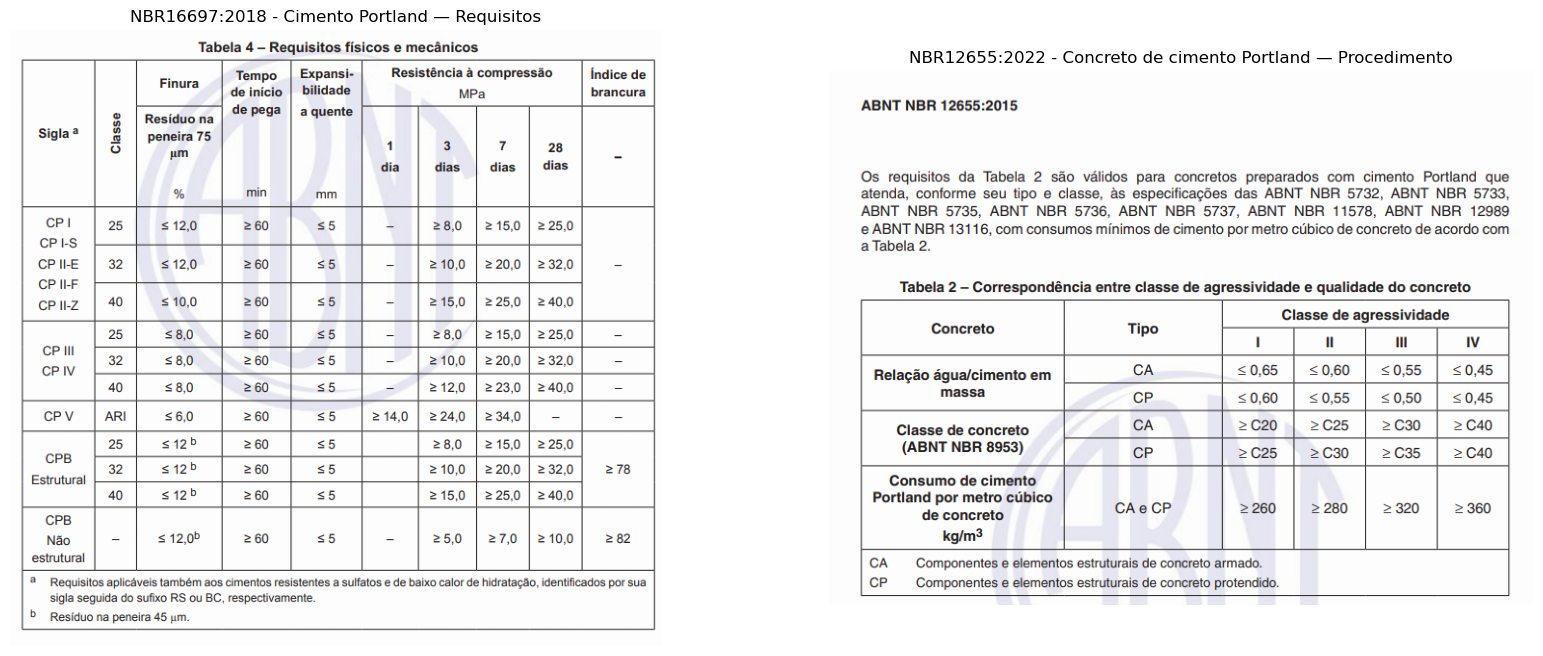

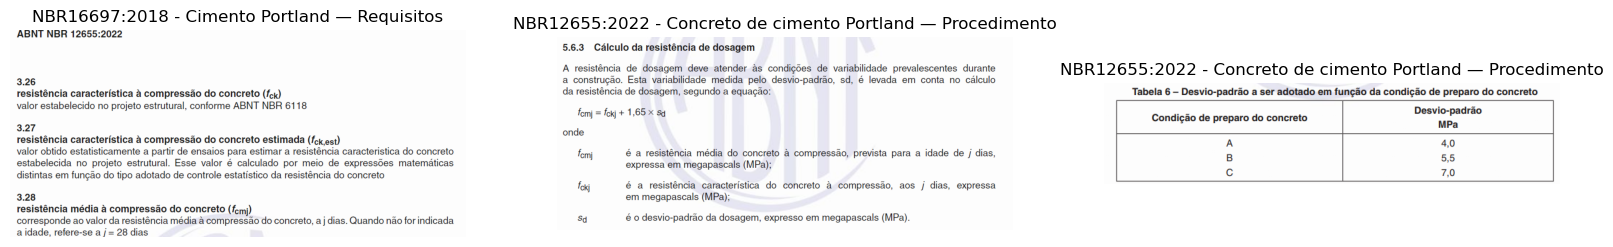

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

img1 = mpimg.imread('imgs/nbr16697.png')
axs[0].imshow(img1)
axs[0].axis('off')  # Hide axes
axs[0].set_title('NBR16697:2018 - Cimento Portland — Requisitos')

img2 = mpimg.imread('imgs/nbr12655.png')
axs[1].imshow(img2)
axs[1].axis('off')  # Hide axes
axs[1].set_title('NBR12655:2022 - Concreto de cimento Portland — Procedimento')

plt.show()


# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

img3 = mpimg.imread('imgs/nbr12655_definicoes.png')
axs[0].imshow(img3)
axs[0].axis('off')  # Hide axes
axs[0].set_title('NBR16697:2018 - Cimento Portland — Requisitos')

img4 = mpimg.imread('imgs/nbr12655_resistencia.png')
axs[1].imshow(img4)
axs[1].axis('off')  # Hide axes
axs[1].set_title('NBR12655:2022 - Concreto de cimento Portland — Procedimento')

img5 = mpimg.imread('imgs/nbr12655_sd.png')
axs[2].imshow(img5)
axs[2].axis('off')  # Hide axes
axs[2].set_title('NBR12655:2022 - Concreto de cimento Portland — Procedimento')


def NBR_compressive_strength(concrete_class, age_days):
    # Dictionary to hold compressive strength data at 3, 7, and 28 days for each class
    compressive_strength = {
        'CP I': {'3_days': 8.0, '7_days': 15.0, '28_days': 25.0},
        'CP I-S': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP I-E': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP II-F': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP II-Z': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP III': {'3_days': 10.0, '7_days': 18.0, '28_days': 25.0},
        'CP IV': {'3_days': 14.0, '7_days': 23.0, '28_days': 40.0},
        'CP V': {'3_days': 14.0, '7_days': 24.0, '28_days': 34.0},
    }

    # Get the compressive strength for the specified class
    if concrete_class in compressive_strength:
        return compressive_strength[concrete_class][age_days]
    else:
        return "Concrete class/age not found"

# Example usage:
concrete_class = 'CP V'
age = '7_days'
strength = NBR_compressive_strength(concrete_class, age)
# print(f"Compressive strength for {concrete_class}:\n{age}: {strength}")

In [6]:
from Tbx_PreProcessing import *
from Tbx_Regression import *

# Pré-processamento

## Filtro "empírico"

In [16]:
ID_columns = ['Empresa', 'Planta', 'Nota Fiscal', 'Data', 'Horário', 'Cidade', 'cimento Tipo', 'cimento Classe de resistência']
FCK_columns = ['Fc 3d', 'Fc 7d', 'Fc 28d', 'Fck', 'Fc_hat']

df_concreto_traco = pd.read_pickle('data/data_clean_Concreto_traco.pkl')

print('Dataset shape:', df_concreto_traco.shape)
df_concreto_traco.head()

Dataset shape: (51340, 46)


,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,CT Plastificante,CT Polifuncional,CT Superplastificante,CT Incorporador de ar,CT Brita 0,CT Brita 1,CT Brita 2,CT Areia natural,CT Areia artificial,CT Água
12080,303,AA,49654,07/10/2021,14:11:37,SÃO JOSÉ DO RIO PRETO,CP II-F,40,212.875000,1.996250,...,0.0,0.0,0.0,0.0,1074.0,0.0,0.0,889.0,0.0,193.0
12081,303,AA,50407,22/11/2021,09:35:14,SÃO JOSÉ DO RIO PRETO,CP II-F,40,228.000000,2.204998,...,0.0,0.0,0.0,0.0,283.0,851.0,0.0,841.0,0.0,186.0
12082,303,AA,49613,06/10/2021,11:18:42,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.125000,1.904999,...,0.0,0.0,0.0,0.0,339.0,794.0,0.0,866.0,0.0,185.0
12083,303,AA,49657,07/10/2021,15:37:02,SÃO JOSÉ DO RIO PRETO,CP II-F,40,213.272727,2.021817,...,0.0,0.0,0.0,0.0,1074.0,0.0,0.0,889.0,0.0,193.0
12084,303,AA,49604,06/10/2021,07:31:10,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.250000,1.901249,...,0.0,0.0,0.0,0.0,339.0,794.0,0.0,866.0,0.0,185.0


In [29]:
# Cria variável 'A/C', converte tipos, aplica filtros que estão nos parâmetros (valores < que)
df_traco_processed = preprocess_data(data = df_concreto_traco,
                                     params_filter = {'Fc 28d': 60},
                                     verbose = False)

# ATENÇÃO!!!!!!!! REVISAR SE É ISSO MSM
df_traco_processed = df_traco_processed[df_traco_processed['Fc 7d'] != 0]
print('Dataset shape:', df_traco_processed.shape)

df_traco_processed['Fc_hat'] = df_traco_processed['Fc 28d']

df_traco_processed['Status'] = np.where(df_traco_processed['Fc_hat'] >= df_traco_processed['Fck'], 1, 0)

df_traco_processed.head()

Dataset shape: (38673, 49)


,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento,Fc_hat,Status
12080,303.0,AA,49654.0,07/10/2021,14:11:37,SÃO JOSÉ DO RIO PRETO,CP II-F,40,212.875000,1.996250,...,1963.0,5.042254,0.000000,4.173709,0.0,5.042254,4.173709,9.215962,19.0,0
12081,303.0,AA,50407.0,22/11/2021,09:35:14,SÃO JOSÉ DO RIO PRETO,CP II-F,40,228.000000,2.204998,...,1975.0,1.235808,3.716157,3.672489,0.0,4.951965,3.672489,8.624454,20.1,1
12082,303.0,AA,49613.0,06/10/2021,11:18:42,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.125000,1.904999,...,1999.0,1.661765,3.892157,4.245098,0.0,5.553922,4.245098,9.799020,17.6,0
12083,303.0,AA,49657.0,07/10/2021,15:37:02,SÃO JOSÉ DO RIO PRETO,CP II-F,40,213.272727,2.021817,...,1963.0,5.042254,0.000000,4.173709,0.0,5.042254,4.173709,9.215962,17.7,0
12084,303.0,AA,49604.0,06/10/2021,07:31:10,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.250000,1.901249,...,1999.0,1.661765,3.892157,4.245098,0.0,5.553922,4.245098,9.799020,17.9,0


In [42]:
# Baseline
class_percentages = df_traco_processed['Status'].value_counts(normalize=True) * 100
print(class_percentages.apply(lambda x: f"{x:.2f}%"))

Status
1    88.91%
0    11.09%
Name: proportion, dtype: object


In [ ]:
# Define the resampling methods
    oversample = SMOTE(random_state = 42)
    undersample = RandomUnderSampler(random_state = 42)

# Apply oversampling to the training data
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)

# Apply undersampling to the oversampled training data
X_train_balanced, y_train_balanced = undersample.fit_resample(X_train_oversampled, y_train_oversampled)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the balanced training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Define the classification algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
    }

# Initialize a dictionary to store results
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train_scaled, y_train_balanced)

    # Make predictions
    y_pred = clf.predict(X_test_scaled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T

# Print the report
print("Classification Algorithms Performance Report:")
print(results_df)
np.unique(y_train_balanced, return_counts = True)
df_CPV.columns
qwe = df_concreto_traco[df_concreto_traco['cimento Tipo'] == 'CPV ARI RS'].copy()
for c in qwe.iloc[:, 5:]:
    qwe[c] = qwe[c].astype(float)
qwe.describe()

In [61]:
run_classification_CV(data = df_traco_processed,
                      drop_columns = ID_columns + FCK_columns,
                      target = 'Status',
                      n_splits = 3)

TypeError: StratifiedKFold.split() missing 1 required positional argument: 'y'

In [80]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold

def run_classification_CV_sampling(data,
                                   drop_columns,
                                   target,
                                   n_splits = 5,
                                   sampling_method = None,
                                   sampling_ratio = 0.7):
    
    # Split the dataset into features and target
    X = data.drop(drop_columns + [target], axis=1)
    y = data[target]

    # Initialize the Min-Max Scaler
    scaler = MinMaxScaler()

    # Initialize K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Define the classification algorithms
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter = 500, random_state=42),
        'Support Vector Classifier': SVC(),
        # 'Decision Tree Classifier': DecisionTreeClassifier(),
        'Random Forest Classifier': RandomForestClassifier(random_state=42),
        # 'Gradient Boosting Classifier': GradientBoostingClassifier(),
        # 'K-Nearest Neighbors': KNeighborsClassifier()
    }

    # Initialize a dictionary to store results
    results = {name: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 
                      'Sampling Method': [], 'Class Distribution (%)': []} for name in classifiers}

    # Train and evaluate each classifier
    for name, classifier in classifiers.items():
        accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
        class_distributions = []

        for train_index, test_index in skf.split(X, y):
            # Split the data into training and testing sets
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Apply sampling methods if specified
            if sampling_method == 'oversample':
                oversample = SMOTE(sampling_strategy=sampling_ratio, random_state=42)
                X_train, y_train = oversample.fit_resample(X_train, y_train)
            elif sampling_method == 'undersample':
                undersample = RandomUnderSampler(sampling_strategy=sampling_ratio, random_state=42)
                X_train, y_train = undersample.fit_resample(X_train, y_train)
            elif sampling_method == 'both':
                combined_sample = SMOTEENN(sampling_strategy=sampling_ratio, random_state=42)
                X_train, y_train = combined_sample.fit_resample(X_train, y_train)

            # Calculate class distribution percentages
            class_distribution = y_train.value_counts(normalize=True) * 100
            class_distributions.append(dict(class_distribution))

            # Scale the training and testing data separately to avoid data leakage
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Train the model
            classifier.fit(X_train_scaled, y_train)

            # Make predictions
            y_pred = classifier.predict(X_test_scaled)

            # Calculate performance metrics
            accuracy_scores.append(accuracy_score(y_test, y_pred))
            precision_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
            recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        # Store mean results for each classifier
        results[name]['Accuracy'] = sum(accuracy_scores) / len(accuracy_scores)
        results[name]['Precision'] = sum(precision_scores) / len(precision_scores)
        results[name]['Recall'] = sum(recall_scores) / len(recall_scores)
        results[name]['F1 Score'] = sum(f1_scores) / len(f1_scores)
        results[name]['Sampling Method'] = sampling_method if sampling_method else 'None'
        results[name]['Class Distribution (%)'] = pd.DataFrame(class_distributions).mean().round(2).to_dict()

    # Convert results to DataFrame for better readability
    results_df = pd.DataFrame(results).T

    # Print the report
    print("Classification Algorithms Performance Report:")
    print(results_df)

    return results_df



In [69]:
sampling_ratio = 0.5

_ = run_classification_CV_sampling(data = df_traco_processed,
                                   drop_columns = ID_columns + FCK_columns,
                                   target = 'Status',
                                   n_splits = 3,
                                   sampling_method = None,
                                   sampling_ratio = sampling_ratio)

Classification Algorithms Performance Report:
                          Accuracy Precision    Recall  F1 Score  \
Logistic Regression       0.889251  0.863136  0.889251  0.837627   
Random Forest Classifier  0.887363  0.863475  0.887363  0.870057   

                         Sampling Method Class Distribution (%)  
Logistic Regression                 None   {1: 88.91, 0: 11.09}  
Random Forest Classifier            None   {1: 88.91, 0: 11.09}  


In [70]:
_ = run_classification_CV_sampling(data = df_traco_processed,
                                   drop_columns = ID_columns + FCK_columns,
                                   target = 'Status',
                                   n_splits = 3,
                                   sampling_method = 'both',
                                   sampling_ratio = sampling_ratio)

Classification Algorithms Performance Report:
                          Accuracy Precision    Recall  F1 Score  \
Logistic Regression       0.641404  0.847291  0.641404  0.707797   
Random Forest Classifier  0.821995  0.869164  0.821995  0.840813   

                         Sampling Method Class Distribution (%)  
Logistic Regression                 both   {1: 57.75, 0: 42.25}  
Random Forest Classifier            both   {1: 57.75, 0: 42.25}  


In [71]:
# Melhor alternativa
_ = run_classification_CV_sampling(data = df_traco_processed,
                                   drop_columns = ID_columns + FCK_columns,
                                   target = 'Status',
                                   n_splits = 3,
                                   sampling_method = 'oversample',
                                   sampling_ratio = sampling_ratio)

Classification Algorithms Performance Report:
                          Accuracy Precision    Recall  F1 Score  \
Logistic Regression       0.719158  0.835487  0.719158  0.763987   
Random Forest Classifier  0.870659  0.865799  0.870659  0.868118   

                         Sampling Method Class Distribution (%)  
Logistic Regression           oversample   {1: 58.82, 0: 41.18}  
Random Forest Classifier      oversample   {1: 58.82, 0: 41.18}  


In [72]:
_ = run_classification_CV_sampling(data = df_traco_processed,
                                   drop_columns = ID_columns + FCK_columns,
                                   target = 'Status',
                                   n_splits = 3,
                                   sampling_method = 'undersample',
                                   sampling_ratio = sampling_ratio)

Classification Algorithms Performance Report:
                          Accuracy Precision    Recall  F1 Score  \
Logistic Regression       0.722804  0.834827  0.722804  0.766348   
Random Forest Classifier  0.748067   0.87149  0.748067  0.790162   

                         Sampling Method Class Distribution (%)  
Logistic Regression          undersample   {1: 58.82, 0: 41.18}  
Random Forest Classifier     undersample   {1: 58.82, 0: 41.18}  


In [6]:
# X = df_traco_processed.drop(ID_columns + FCK_columns, axis = 1)
# y = df_traco_processed['Fc 28d']
# 
# eval_regressor_CV(X, X, y, y, regressors = None, CV = True)

## Filtros NBR

In [81]:
# Remove de acordo com parâmetros, aPlica filtros da norma (fator a/c, resistencia esperada,etc)
df_traco_processed_NBR = apply_standardization_filter(data = df_traco_processed,
                                                            remove_params = {'15': 15,
                                                                             '50': 50},
                                                            regression = False)

df_traco_processed_NBR

Instâncias eliminadas devido a falta de representatividade (Fck = 15 MPA):                 5
Instâncias eliminadas devido a falta de representatividade (Fck = 50 MPA):                 42
Instâncias eliminadas devido não conformidade NBR6118:2023 (relação água/cimento):         14449


,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento,Fc_hat,Status
12553,303.0,AA,50427.0,23/11/2021,09:17:47,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.666667,2.802219,...,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184,32.5,1
12806,303.0,AA,50335.0,17/11/2021,06:52:20,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.333333,2.808334,...,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184,23.7,0
12842,303.0,AA,57427.0,30/09/2022,15:14:54,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.714286,2.509997,...,1910.0,1.188356,2.784247,2.568493,0.000000,3.972603,2.568493,6.541096,32.4,0
12919,303.0,AA,49430.0,28/09/2021,12:59:05,SÃO JOSÉ DO RIO PRETO,CP II-F,40,320.375000,3.102497,...,1922.0,1.153061,2.700680,2.683673,0.000000,3.853741,2.683673,6.537415,40.4,1
12976,303.0,AA,57608.0,13/10/2022,10:41:31,SÃO JOSÉ DO RIO PRETO,CP II-F,40,296.875000,2.511250,...,1894.0,1.151007,2.694631,2.510067,0.000000,3.845638,2.510067,6.355705,31.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236204,303.0,Z,71913.0,16/06/2021,11:10:22,BRASÍLIA,CP II-F,40,350.250000,3.702499,...,1859.0,0.763533,2.299145,0.980057,1.253561,3.062678,2.233618,5.296296,54.8,1
236205,303.0,Z,71919.0,16/06/2021,13:12:25,BRASÍLIA,CP II-F,40,350.000000,3.701248,...,1859.0,0.763533,2.299145,0.980057,1.253561,3.062678,2.233618,5.296296,55.4,1
236206,303.0,Z,71154.0,17/05/2021,09:11:18,BRASÍLIA,CP II-F,40,258.428571,0.000000,...,1850.0,3.035294,0.000000,1.055882,1.350000,3.035294,2.405882,5.441176,48.5,1
236208,303.0,Z,77027.0,14/02/2022,11:20:10,BRASÍLIA,CP II-F,40,388.625000,3.707497,...,1773.0,2.619537,0.000000,0.856041,1.082262,2.619537,1.938303,4.557841,44.5,1


In [82]:
_ = run_classification_CV_sampling(data = df_traco_processed_NBR,
                                   drop_columns = ID_columns + FCK_columns,
                                   target = 'Status',
                                   n_splits = 3,
                                   sampling_method = None,
                                   sampling_ratio = sampling_ratio)

Classification Algorithms Performance Report:
                           Accuracy Precision    Recall  F1 Score  \
Logistic Regression        0.900236  0.863105  0.900236  0.853653   
Support Vector Classifier  0.900194   0.81035  0.900194  0.852913   
Random Forest Classifier   0.898085  0.879003  0.898085  0.885124   

                          Sampling Method Class Distribution (%)  
Logistic Regression                  None    {1: 90.02, 0: 9.98}  
Support Vector Classifier            None    {1: 90.02, 0: 9.98}  
Random Forest Classifier             None    {1: 90.02, 0: 9.98}  


In [83]:
_ = run_classification_CV_sampling(data = df_traco_processed_NBR,
                                   drop_columns = ID_columns + FCK_columns,
                                   target = 'Status',
                                   n_splits = 3,
                                   sampling_method = 'oversample',
                                   sampling_ratio = sampling_ratio)

Classification Algorithms Performance Report:
                           Accuracy Precision    Recall  F1 Score  \
Logistic Regression        0.704471  0.862093  0.704471  0.760602   
Support Vector Classifier  0.726021  0.870309  0.726021  0.777077   
Random Forest Classifier   0.878066  0.879157  0.878066  0.878599   

                          Sampling Method Class Distribution (%)  
Logistic Regression            oversample   {1: 58.82, 0: 41.18}  
Support Vector Classifier      oversample   {1: 58.82, 0: 41.18}  
Random Forest Classifier       oversample   {1: 58.82, 0: 41.18}  


# Baseline regressão

In [84]:
instances_per_class = df_traco_processed_NBR.groupby(['cimento Tipo', 'cimento Classe de resistência', 'Fck']).count()['Fc 28d'].reset_index()

keep_instances = instances_per_class[instances_per_class['Fc 28d'] > 30].reset_index()

df_traco_processed_NBR = df_traco_processed_NBR.merge(
                                keep_instances[['cimento Tipo', 'cimento Classe de resistência', 'Fck']],
                                on=['cimento Tipo', 'cimento Classe de resistência', 'Fck'],
                                how='inner')

df_traco_processed_NBR

,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento,Fc_hat,Status
0,303.0,AA,50427.0,23/11/2021,09:17:47,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.666667,2.802219,...,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184,32.5,1
1,303.0,AA,50335.0,17/11/2021,06:52:20,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.333333,2.808334,...,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184,23.7,0
2,303.0,AA,60004.0,28/03/2023,08:15:50,SÃO JOSÉ DO RIO PRETO,CP II-F,40,205.428571,1.708566,...,1949.0,1.234266,2.888112,2.692308,0.000000,4.122378,2.692308,6.814685,31.4,1
3,303.0,AA,59842.0,16/03/2023,08:24:51,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.125000,2.809998,...,1931.0,0.993151,2.989726,2.630137,0.000000,3.982877,2.630137,6.613014,31.9,1
4,303.0,AA,59849.0,16/03/2023,11:14:41,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.625000,2.797501,...,1931.0,1.191781,2.791096,2.630137,0.000000,3.982877,2.630137,6.613014,31.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24058,303.0,N,67418.0,11/03/2022,15:15:57,FLORIANÓPOLIS,CP IV,32,396.428571,2.797141,...,1853.0,0.665605,2.662420,1.254777,1.318471,3.328025,2.573248,5.901274,33.2,1
24059,303.0,N,71662.0,01/11/2022,13:43:40,FLORIANÓPOLIS,CP IV,32,363.250000,2.503750,...,1751.0,2.853731,0.000000,1.182090,1.191045,2.853731,2.373134,5.226866,36.1,1
24060,303.0,N,67943.0,11/04/2022,13:39:29,FLORIANÓPOLIS,CP IV,32,0.000000,0.000000,...,1794.0,2.914201,0.000000,1.165680,1.227811,2.914201,2.393491,5.307692,30.7,1
24061,303.0,N,68384.0,06/05/2022,11:05:18,FLORIANÓPOLIS,CP IV,32,385.000000,2.703334,...,1864.0,0.677419,2.706452,1.280645,1.348387,3.383871,2.629032,6.012903,23.3,0


In [159]:
# Como não foi feita imputação de valores, somente remoção e verificações que mantem os dados independentes, aqui é feita separação treino-validação-teste
group_columns = ['cimento Tipo', 'cimento Classe de resistência', 'Fck']
drop_columns = [col for col in ID_columns + FCK_columns if col not in group_columns and col in df_traco_processed_NBR.columns]
target = 'Status'

X = df_traco_processed_NBR.drop(drop_columns + ['Status'], axis=1)
y = df_traco_processed_NBR[target]

# Combine the columns 'cimento Tipo' and 'cimento Classe de resistência' for stratification
stratify_col = X[group_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = stratify_col,
                                                    random_state=42)


# Combine the columns 'cimento Tipo' and 'cimento Classe de resistência' for stratification
stratify_col = X_train[group_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)

# Split the data into training and testing sets
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train,
                                        test_size=0.3,
                                        stratify = stratify_col,
                                        random_state=42)

X_tr_clean = X_tr.drop(columns = group_columns)
X_ts_clean = X_ts.drop(columns = group_columns)

print('Training-Test set:')
for v in [y_train, y_test]:
    print(v.shape)

print('\nTraining-Validation set:')
for v in [y_tr, y_ts]:
    print(v.shape)

Training-Test set:
(16844,)
(7219,)

Training-Validation set:
(11790,)
(5054,)


In [173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def eval_fulldata(X_train, X_test, y_tr, y_ts, classifiers):
    # Initialize the Min-Max Scaler
    scaler = MinMaxScaler()

    # Fit the scaler on the training data and transform both the training and test data
    X_tr = scaler.fit_transform(X_train)
    X_ts = scaler.transform(X_test)

    # Initialize a dictionary to store results
    results = {}

    # Train and evaluate each classifier
    for name, classifier in classifiers.items():
        # Train the model
        classifier.fit(X_tr, y_tr)

        # Make predictions
        y_pred = classifier.predict(X_ts)

        # Calculate performance metrics
        accuracy = accuracy_score(y_ts, y_pred)
        precision = precision_score(y_ts, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_ts, y_pred, average='weighted')
        f1 = f1_score(y_ts, y_pred, average='weighted')

        # Calculate class distribution percentages
        class_distributions = y_tr.value_counts(normalize=True) * 100
        
        # Store results
        results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
        results[name]['Class Distribution (%)'] = pd.DataFrame(class_distributions).round(2).to_dict()
    # Convert results to DataFrame for better readability
    results_df = pd.DataFrame(results).T

    return results_df, y_pred


from sklearn.model_selection import KFold

def eval_CV(X_tr, X_ts, y_tr, y_ts, classifiers, n_splits=5):
    # Initialize K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize a dictionary to store results
    results = {name: {'Accuracy_tr': 0., 'Precision_tr': 0., 'Recall_tr': 0., 'F1 Score_tr': 0.,
                      'Accuracy_val': 0., 'Precision_val': 0., 'Recall_val': 0., 'F1 Score_val': 0.,
                      'Accuracy_test': 0., 'Precision_test': 0., 'Recall_test': 0., 'F1 Score_test': 0.} for name in classifiers}

    # Train and evaluate each classifier
    for name, classifier in classifiers.items():
        accuracy_scores_tr, precision_scores_tr, recall_scores_tr, f1_scores_tr = [], [], [], []
        accuracy_scores_val, precision_scores_val, recall_scores_val, f1_scores_val = [], [], [], []
        accuracy_scores_test, precision_scores_test, recall_scores_test, f1_scores_test = [], [], [], []
        class_distributions = []
        
        for train_index, val_index in skf.split(X_tr, y_tr):
            X_train, X_val = X_tr.iloc[train_index], X_tr.iloc[val_index]
            y_train, y_val = y_tr.iloc[train_index], y_tr.iloc[val_index]

            # Scale the data inside the CV loop
            scaler = MinMaxScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)

            # Fit the model
            classifier.fit(X_train_scaled, y_train)

            # Make predictions
            y_pred_train = classifier.predict(X_train_scaled)
            y_pred_val = classifier.predict(X_val_scaled)

            # Calculate performance metrics for training and validation
            accuracy_scores_tr.append(accuracy_score(y_train, y_pred_train))
            precision_scores_tr.append(precision_score(y_train, y_pred_train, average='weighted', zero_division=0))
            recall_scores_tr.append(recall_score(y_train, y_pred_train, average='weighted'))
            f1_scores_tr.append(f1_score(y_train, y_pred_train, average='weighted'))

            accuracy_scores_val.append(accuracy_score(y_val, y_pred_val))
            precision_scores_val.append(precision_score(y_val, y_pred_val, average='weighted', zero_division=0))
            recall_scores_val.append(recall_score(y_val, y_pred_val, average='weighted'))
            f1_scores_val.append(f1_score(y_val, y_pred_val, average='weighted'))

            # Evaluate on the full test set for each fold
            X_ts_scaled = scaler.transform(X_ts)
            y_pred_test = classifier.predict(X_ts_scaled)

            accuracy_scores_test.append(accuracy_score(y_ts, y_pred_test))
            precision_scores_test.append(precision_score(y_ts, y_pred_test, average='weighted', zero_division=0))
            recall_scores_test.append(recall_score(y_ts, y_pred_test, average='weighted'))
            f1_scores_test.append(f1_score(y_ts, y_pred_test, average='weighted'))

            # Calculate class distribution percentages
            class_distribution = y_tr.value_counts(normalize=True) * 100
            class_distributions.append(dict(class_distribution))
            
            
        # Store mean results for CV (train, validation, and test)
        results[name]['Accuracy_tr'] = sum(accuracy_scores_tr) / len(accuracy_scores_tr)
        results[name]['Precision_tr'] = sum(precision_scores_tr) / len(precision_scores_tr)
        results[name]['Recall_tr'] = sum(recall_scores_tr) / len(recall_scores_tr)
        results[name]['F1 Score_tr'] = sum(f1_scores_tr) / len(f1_scores_tr)

        results[name]['Accuracy_val'] = sum(accuracy_scores_val) / len(accuracy_scores_val)
        results[name]['Precision_val'] = sum(precision_scores_val) / len(precision_scores_val)
        results[name]['Recall_val'] = sum(recall_scores_val) / len(recall_scores_val)
        results[name]['F1 Score_val'] = sum(f1_scores_val) / len(f1_scores_val)

        results[name]['Accuracy_test'] = sum(accuracy_scores_test) / len(accuracy_scores_test)
        results[name]['Precision_test'] = sum(precision_scores_test) / len(precision_scores_test)
        results[name]['Recall_test'] = sum(recall_scores_test) / len(recall_scores_test)
        results[name]['F1 Score_test'] = sum(f1_scores_test) / len(f1_scores_test)

        # results[name]['Sampling Method'] = sampling_method if sampling_method else 'None'
        results[name]['Class Distribution (%)'] = pd.DataFrame(class_distributions).mean().round(2).to_dict()

    # Convert results to DataFrame for better readability
    results_df = pd.DataFrame(results).T

    return results_df


def eval_classifier_CV(X_tr, X_ts, y_tr, y_ts, classifiers=None, CV=False, n_splits=5):
    if classifiers is None:
        classifiers = {
            # 'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
            'Random Forest Classifier': RandomForestClassifier(random_state=42)
        }

    return eval_CV(X_tr, X_ts, y_tr, y_ts, classifiers, n_splits=n_splits) if CV else \
        eval_fulldata(X_tr, X_ts, y_tr, y_ts, classifiers)


In [161]:
eval_classifier_CV(X_tr_clean, X_ts_clean, y_tr, y_ts, classifiers = None, CV = True, n_splits = 3)

,Accuracy_test,Accuracy_tr,Accuracy_val,Class Distribution (%),F1 Score_test,F1 Score_tr,F1 Score_val,Precision_test,Precision_tr,Precision_val,Recall_test,Recall_tr,Recall_val
Random Forest Classifier,0.886756,0.995802,0.892112,"{1: 90.0, 0: 10.0}",0.870238,0.995773,0.875858,0.861009,0.995797,0.867648,0.886756,0.995802,0.892112


In [162]:
def grid_search_FS_RF(X, y, param_grid, verbose=True, n_splits=5):
    # Define multiple metrics for classification
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted', zero_division=0),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }

    # Initialize RandomForestClassifier
    rf = RandomForestClassifier(random_state=42)

    # Set up KFold cross-validation
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Set up GridSearchCV for RandomForestClassifier
    grid_search_rf = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=kfold,
        scoring=scoring,
        refit='f1',  # The metric to use for the final model selection
        verbose=1
    )

    # Fit the grid search for RandomForestClassifier
    grid_search_rf.fit(X, y)

    # Get the best RandomForestClassifier parameters
    best_rf = grid_search_rf.best_params_
    print("Best parameters for RandomForestClassifier: ", best_rf)

    # Get the best estimator (the one that gave the best result)
    best_model = grid_search_rf.best_estimator_

    # Get the feature importances from the best model
    feature_importances = best_model.feature_importances_

    # Create a DataFrame for better readability
    feature_importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    if verbose:
        print("\nFeature Importances for the Best Model:")
        print(feature_importances_df)

    return grid_search_rf, feature_importances_df


In [163]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    }

best_selector = grid_search_FS_RF(X_tr_clean, y_tr, param_grid_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for RandomForestClassifier:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Feature Importances for the Best Model:
                              Feature    Importance
14                Tempo de transporte  1.692035e-01
0                    concreto Cimento  5.098087e-02
4              concreto Areia natural  4.963584e-02
2                    concreto Brita 0  4.886930e-02
5           concreto Areia artificial  4.451617e-02
8      concreto Umidade areia natural  4.264128e-02
9   concreto Umidade areia artificial  4.132667e-02
1              concreto Polifuncional  3.798522e-02
26                                 AC  3.241154e-02
3                    concreto Brita 1  3.106128e-02
30                 CT Brita 0_Cimento  3.089586e-02
32           CT Areia natural_Cimento  2.801518e-02
23                   CT Areia natural  2.798096e-02
21                         CT Brita 0  2.600089e-02
33        C

In [164]:
feat_importance = best_selector[1]
features_selected = feat_importance['Feature'].tolist()[:10]
features_selected

['Tempo de transporte',
 'concreto Cimento',
 'concreto Areia natural',
 'concreto Brita 0',
 'concreto Areia artificial',
 'concreto Umidade areia natural',
 'concreto Umidade areia artificial',
 'concreto Polifuncional',
 'AC',
 'concreto Brita 1']

In [165]:
eval_classifier_CV(X_tr_clean[features_selected], X_ts_clean[features_selected], y_tr, y_ts, classifiers = None, CV = True, n_splits = 3)

,Accuracy_test,Accuracy_tr,Accuracy_val,Class Distribution (%),F1 Score_test,F1 Score_tr,F1 Score_val,Precision_test,Precision_tr,Precision_val,Recall_test,Recall_tr,Recall_val
Random Forest Classifier,0.88979,0.992875,0.891688,"{1: 90.0, 0: 10.0}",0.859116,0.992774,0.860048,0.846335,0.992889,0.846721,0.88979,0.992875,0.891688


## Análise dos erros

Mean Squared Error (MSE): 16.379275172864165
Mean Absolute Error (MAE): 3.128452307064588
R-squared (R2): 0.6130381910818736
Error Analysis by Composite Class:
     Composite_Class  Residual                                 Actual
                          mean       std        max        min  count
0         CP II-E_40  0.117174  4.080039  10.901400 -11.570000    170
1         CP II-F_40  0.030186  3.772072  14.215400 -13.789000   1291
2           CP IV_32 -0.160518  3.481249  16.053000  -9.691667    321
3        CPIII RS_40  0.326053  4.680580  16.503970 -12.022500    270
4  CPV ARI RS_ARI-RS -0.090779  4.188585  22.333578 -16.825931   2257


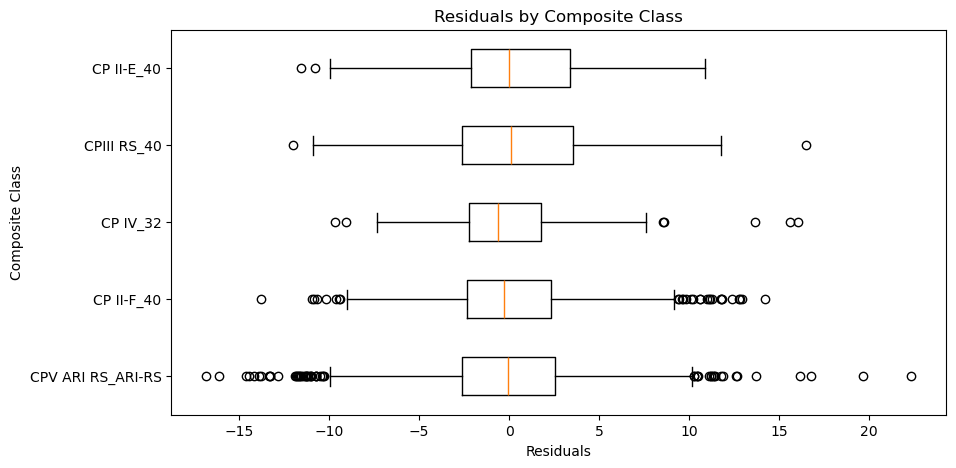

In [15]:
import matplotlib.pyplot as plt


# Fit Random Forest Regressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_tr[features_selected], y_tr)

# Make predictions
y_pred = rf.predict(X_ts[features_selected])

# Calculate residuals
residuals = y_ts - y_pred

# General Performance Metrics
mse = mean_squared_error(y_ts, y_pred)
mae = mean_absolute_error(y_ts, y_pred)
r2 = r2_score(y_ts, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Assuming 'Class1' and 'Class2' are the two columns to stratify by
class_column1 = X_ts[group_columns[0]]
class_column2 = X_ts[group_columns[1]]

# Create a composite class by combining the two columns
composite_class = class_column1.astype(str) + '_' + class_column2.astype(str)

# Create a DataFrame for analysis
results_df = pd.DataFrame({
    'Actual': y_ts,
    'Predicted': y_pred,
    'Residual': residuals,
    'Composite_Class': composite_class
})

# Analyze errors by composite class
error_by_composite_class = results_df.groupby('Composite_Class').agg({
    'Residual': ['mean', 'std', 'max', 'min'],
    'Actual': 'count'
}).reset_index()

print("Error Analysis by Composite Class:")
print(error_by_composite_class)

# Visualize error by composite class
plt.figure(figsize=(10, 5))
plt.boxplot([results_df[results_df['Composite_Class'] == cls]['Residual'] for cls in results_df['Composite_Class'].unique()],
            labels=results_df['Composite_Class'].unique(), vert=False)
plt.title('Residuals by Composite Class')
plt.ylabel('Composite Class')
plt.xlabel('Residuals')
plt.show()


# Focando no tipo de concreto/cimento

In [166]:
tr_CPV = pd.concat([X_tr, y_tr], axis = 1)
tr_CPV = preprocess_data(data = tr_CPV[tr_CPV['cimento Tipo'] == 'CPV ARI RS'],
                                     params_filter = {}, verbose = False)



X_tr_CPV = tr_CPV.drop(columns = 'Status')
y_tr_CPV = tr_CPV['Status']

ts_CPV = pd.concat([X_ts, y_ts], axis = 1)
ts_CPV = preprocess_data(data = ts_CPV[ts_CPV['cimento Tipo'] == 'CPV ARI RS'],
                                     params_filter = {}, verbose = False)

X_ts_CPV = ts_CPV.drop(columns = 'Status')
y_ts_CPV = ts_CPV['Status']

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [2, 10],
    'min_samples_split': [2, 5],
    }

feature_selector = grid_search_FS_RF(X_tr_CPV.drop(columns = group_columns), y_tr_CPV, param_grid_rf, verbose = False)

feat_importance = feature_selector[1]
features_selected = feat_importance['Feature'].tolist()[:10]

X_tr_CPV_FS = X_tr_CPV[features_selected]
X_ts_CPV_FS = X_ts_CPV[features_selected]

eval_classifier_CV(X_tr_CPV_FS, X_ts_CPV_FS, y_tr_CPV, y_ts_CPV,
                  classifiers = None, CV = True, n_splits = 3)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for RandomForestClassifier:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


,Accuracy_test,Accuracy_tr,Accuracy_val,Class Distribution (%),F1 Score_test,F1 Score_tr,F1 Score_val,Precision_test,Precision_tr,Precision_val,Recall_test,Recall_tr,Recall_val
Random Forest Classifier,0.930122,0.991081,0.927618,"{1.0: 94.85, 0.0: 5.15}",0.926578,0.990774,0.925058,0.923323,0.990986,0.922695,0.930122,0.991081,0.927618


In [171]:
def grid_search_RFClassifier(x_train, y_train, param_grid, n_splits = 5):
    # Define the hyperparameter grid for Random Forest

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted', zero_division=0),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }

    # param_grid = {
    #     'n_estimators': [20, 50, 100, 200],
    #     'max_depth': [None, 3, 5, 10, 20],
    #     'min_samples_split': [2, 5, 10],
    #     'min_samples_leaf': [1, 2, 4],
    #     'bootstrap': [True, False]
    # }

    # Initialize Random Forest Regressor
    rf = RandomForestClassifier(random_state = 42)

    # Initialize K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Perform Grid Search with K-Fold Cross-Validation
    grid_search = GridSearchCV(estimator = rf,
                               param_grid = param_grid,
                               scoring = scoring,  # Use multiple metrics including AIC
                               refit = 'recall',  # The metric to use for the final model selection
                               cv = skf,
                               n_jobs = -1,
                               verbose = 2)

    # Fit the model on the training data
    grid_search.fit(x_train, y_train)

    # Get the best RandomForestRegressor parameters
    best_rf = grid_search.best_params_
    print("Best parameters for RandomForestRegressor: ", best_rf)

    return grid_search

In [172]:
param_grid_feat_selection = {
    'n_estimators': [25, 75, 150],
    'max_depth': [2, 10],
    }
    
param_grid_regressor = {
    'n_estimators': [50, 150, 300],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'bootstrap': [True, False]
    }


rf_gridsearch_CPV = grid_search_RFClassifier(X_tr_CPV_FS, y_tr_CPV, param_grid = param_grid_regressor, n_splits = 3)

results_CPV_FS = eval_classifier_CV(X_tr_CPV_FS, X_ts_CPV_FS, y_tr_CPV, y_ts_CPV,
                  classifiers = {'RF grid_search' : rf_gridsearch_CPV.best_estimator_},
                  CV = True, n_splits = 3)

results_CPV_FS

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150}


,Accuracy_test,Accuracy_tr,Accuracy_val,Class Distribution (%),F1 Score_test,F1 Score_tr,F1 Score_val,Precision_test,Precision_tr,Precision_val,Recall_test,Recall_tr,Recall_val
RF grid_search,0.952721,0.952635,0.948944,"{1.0: 94.85, 0.0: 5.15}",0.934661,0.934695,0.928815,0.939232,0.948633,0.93223,0.952721,0.952635,0.948944


In [182]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_errors(X_test, y_test, y_pred, class_names):
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print("Confusion Matrix:\n", conf_matrix)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Classification Report (Precision, Recall, F1-score)
    class_report = classification_report(y_test, y_pred, target_names=class_names)
    print("\nClassification Report:\n", class_report)

    # Misclassified Instances
    misclassified = X_test[y_test != y_pred]
    misclassified_actual = y_test[y_test != y_pred]
    misclassified_predicted = y_pred[y_test != y_pred]
    
    print("\nMisclassified Instances:")
    misclassified_df = pd.DataFrame({
        'Actual': misclassified_actual,
        'Predicted': misclassified_predicted
    })
    misclassified_summary = misclassified_df.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)
    print(misclassified_summary)
    
    return misclassified, misclassified_actual, misclassified_predicted

Confusion Matrix:
 [[   6  102]
 [   4 2130]]


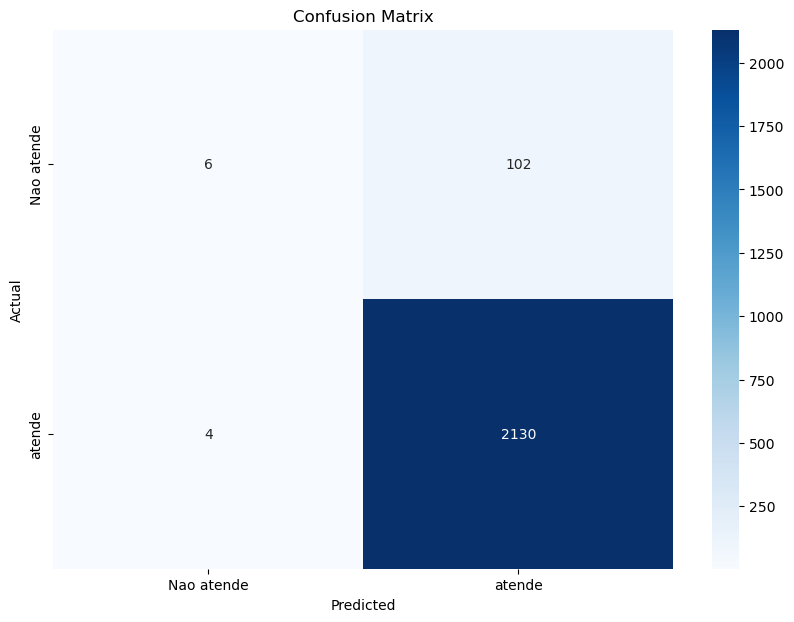


Classification Report:
               precision    recall  f1-score   support

  Nao atende       0.60      0.06      0.10       108
      atende       0.95      1.00      0.98      2134

    accuracy                           0.95      2242
   macro avg       0.78      0.53      0.54      2242
weighted avg       0.94      0.95      0.93      2242


Misclassified Instances:
Predicted  0.0  1.0
Actual             
0.0          0  102
1.0          4    0


In [184]:
results_CPV_FS_all, y_pred_all = eval_classifier_CV(X_tr_CPV_FS, X_ts_CPV_FS, y_tr_CPV, y_ts_CPV,
                                                    classifiers = {'RF grid_search': rf_gridsearch_CPV.best_estimator_},
                                                    CV = False, n_splits = 3)

misclassified_data, actual_labels, predicted_labels = analyze_errors(X_ts_CPV_FS, y_ts_CPV, y_pred_all, ['Nao atende', 'atende'])

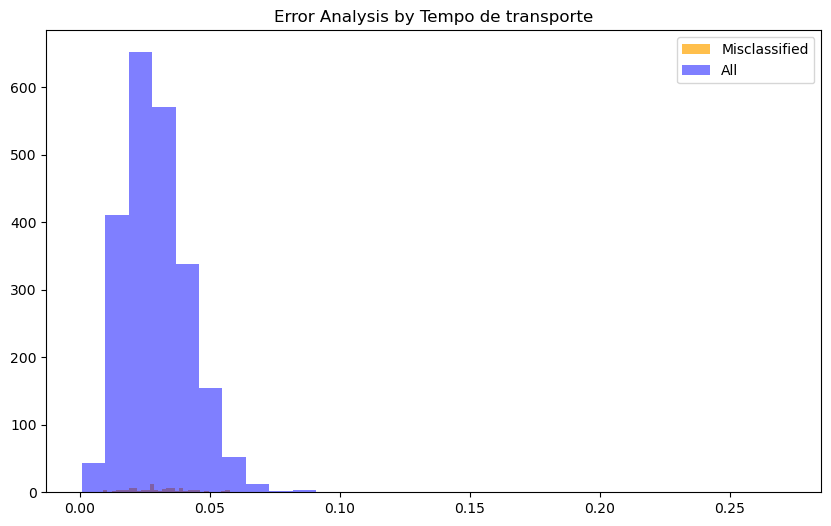

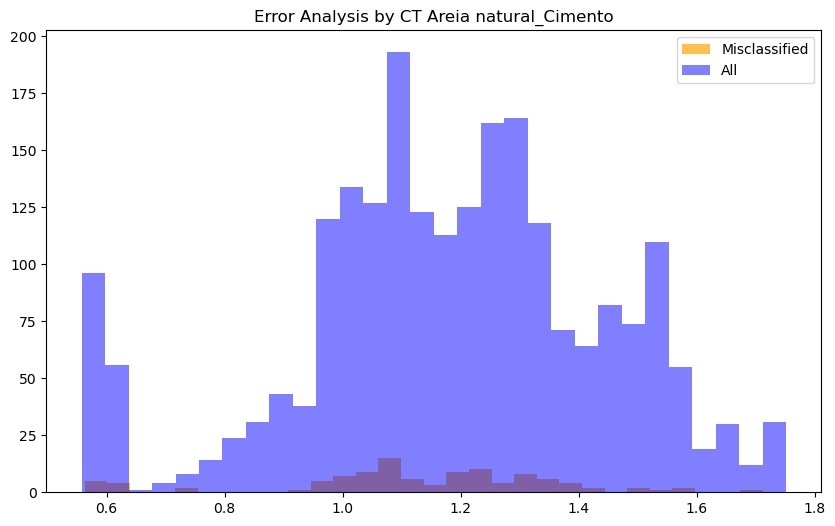

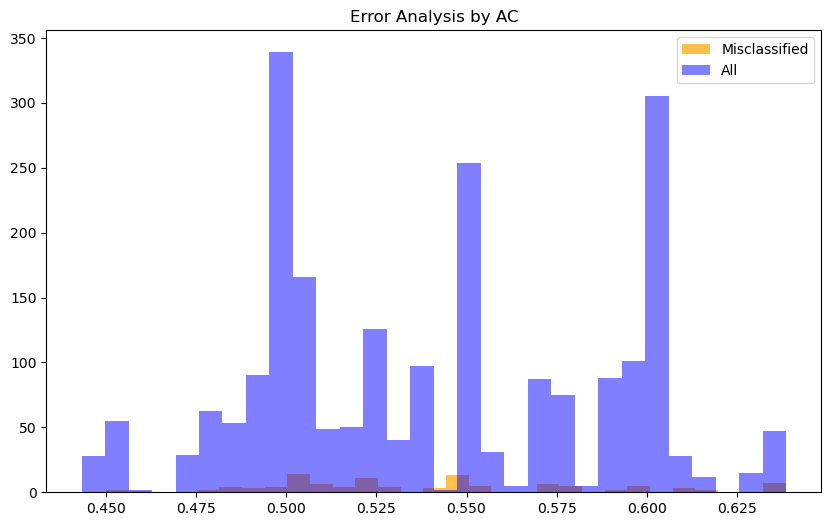

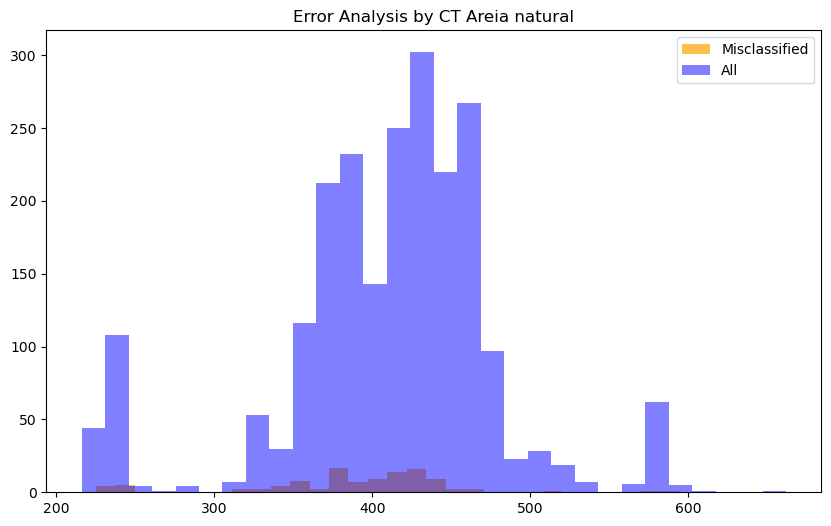

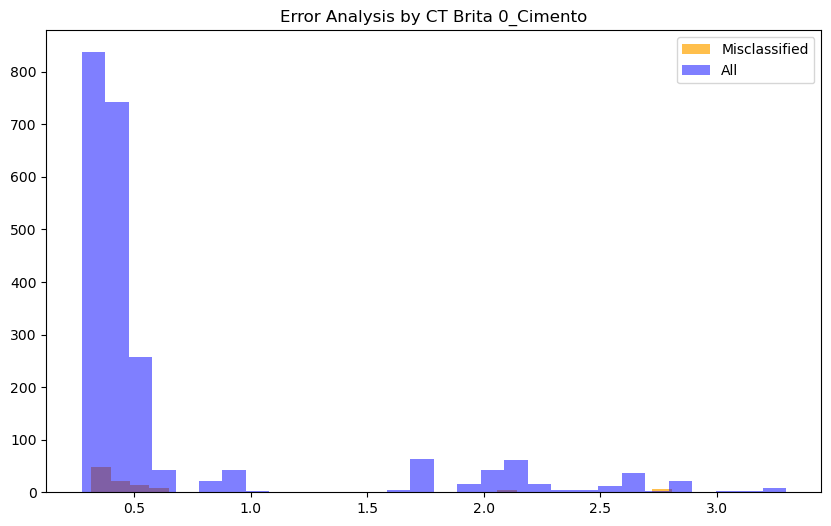

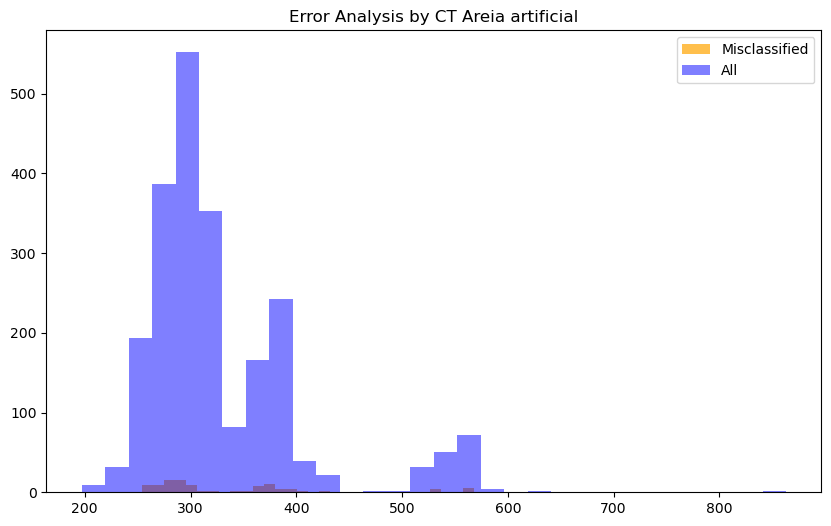

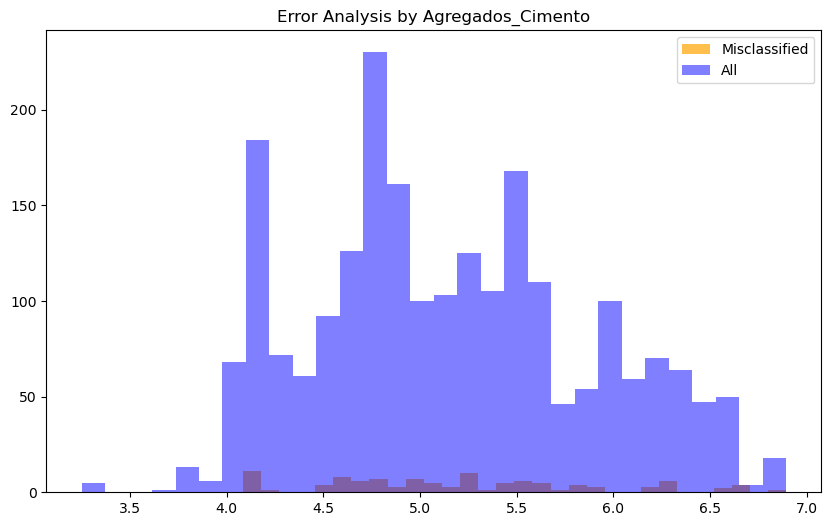

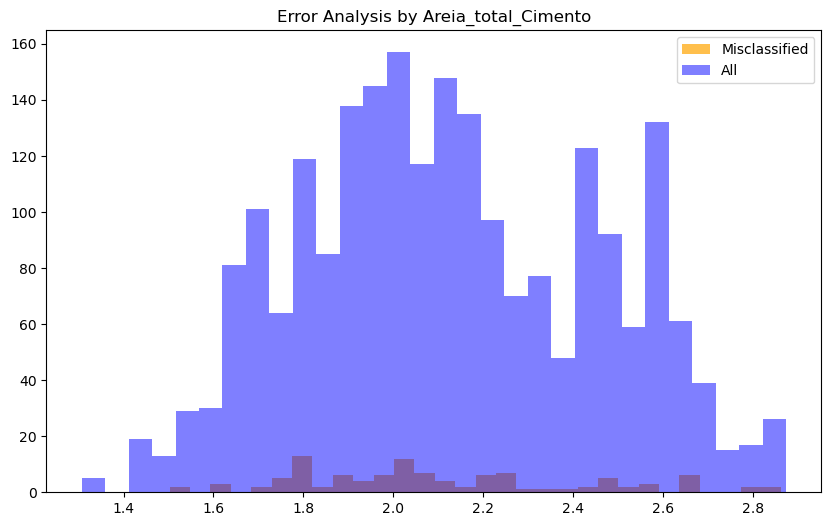

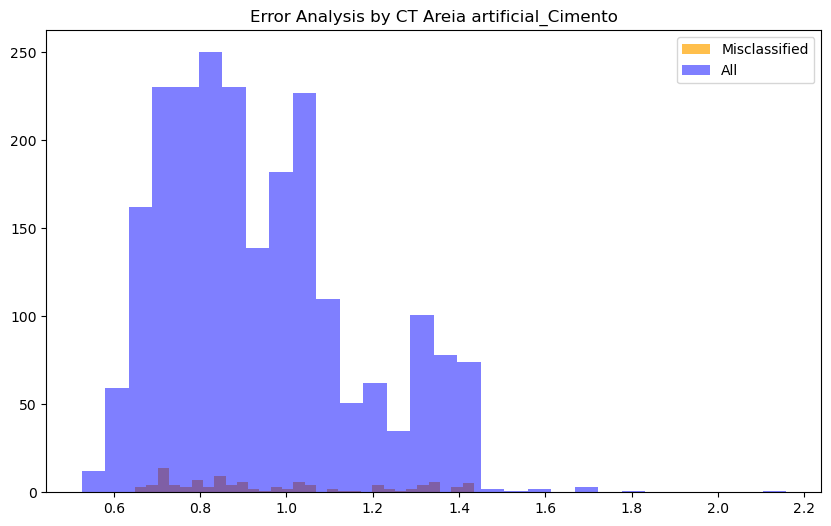

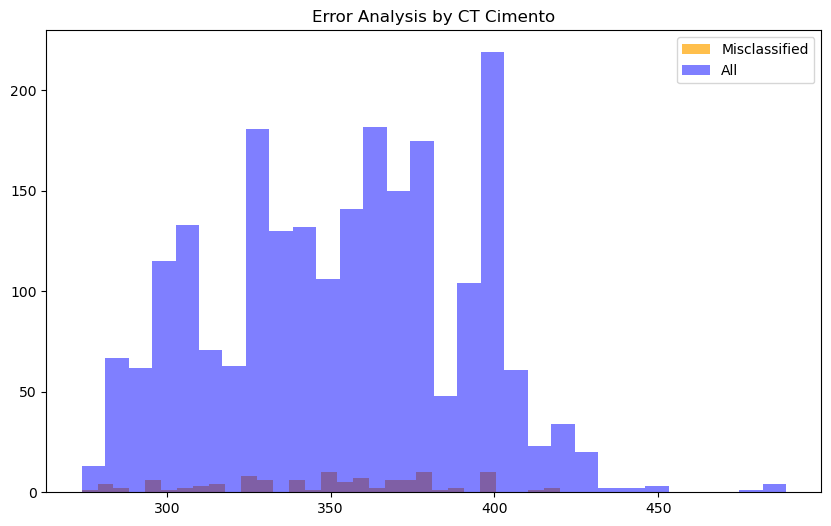

In [185]:
def error_analysis_by_feature(X, y_true, y_pred):
    misclassified_indices = (y_true != y_pred)
    X_misclassified = X[misclassified_indices]
    
    for col in X.columns:
        plt.figure(figsize=(10, 6))
        plt.hist(X_misclassified[col], bins=30, color='orange', alpha=0.7, label="Misclassified")
        plt.hist(X[col], bins=30, color='blue', alpha=0.5, label="All")
        plt.title(f'Error Analysis by {col}')
        plt.legend()
        plt.show()

# Example usage
error_analysis_by_feature(X_ts_CPV_FS, y_ts_CPV, y_pred_all)


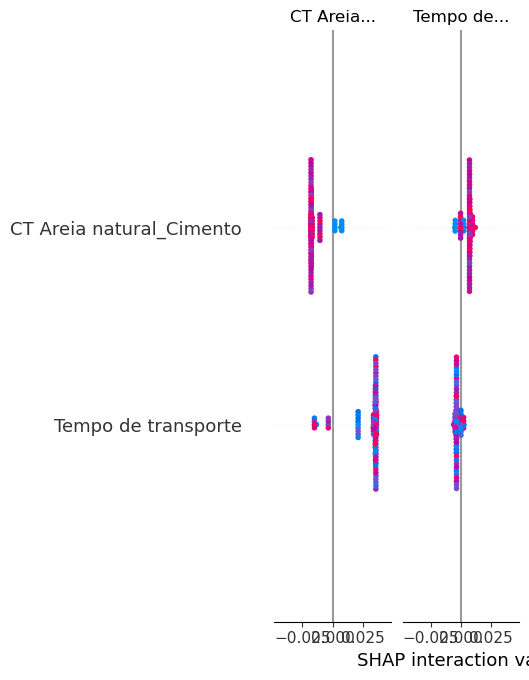

In [196]:
import shap

def shap_error_analysis(model, X, y_true, y_pred):
    # Identify misclassified samples
    misclassified_indices = (y_true != y_pred)
    
    # Use TreeExplainer since RandomForestClassifier is a tree-based model
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values for the misclassified samples
    shap_values = explainer.shap_values(X[misclassified_indices])
    
    # # Ensure shap_values have the correct shape
    # if len(shap_values) > 1:  # For binary classification, shap_values is a list
    #     shap_values = shap_values[1]  # Select SHAP values for the positive class
    # 
    # # If there is an extra column, slice off the last one to match the feature matrix shape
    # if shap_values.shape[1] != X[misclassified_indices].shape[1]:
    #     shap_values = shap_values[:, :-1]
    
    # Plot SHAP values for misclassified instances
    shap.summary_plot(shap_values, X[misclassified_indices])

# Example usage
shap_error_analysis(rf_gridsearch_CPV.best_estimator_, X_ts_CPV_FS, y_ts_CPV, y_pred_all)


In [202]:
from sklearn.inspection import plot_partial_dependence

def partial_dependence_analysis(model, X, features):
    plot_partial_dependence(model, X, features, grid_resolution=50)
    plt.show()

# Example usage
partial_dependence_analysis(rf_gridsearch_CPV.best_estimator_, X_ts_CPV_FS, [X_ts_CPV_FS.columns[:2]])  # Replace with relevant feature indices


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (C:\Users\arthu\AppData\Roaming\Python\Python311\site-packages\sklearn\inspection\__init__.py)

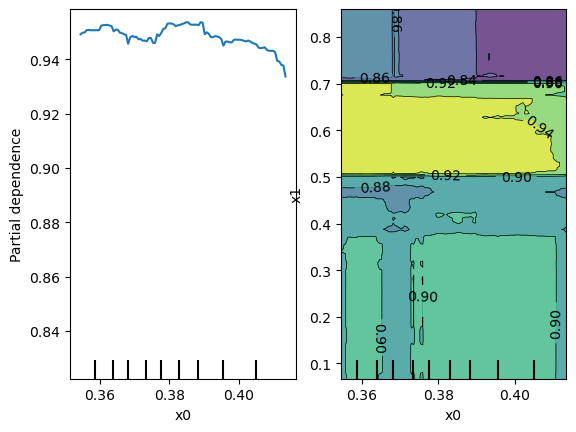

In [205]:

from sklearn.inspection import PartialDependenceDisplay

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and test data
xtreino = scaler.fit_transform(X_tr_CPV_FS)
xteste = scaler.transform(X_ts_CPV_FS)



PartialDependenceDisplay.from_estimator(rf_gridsearch_CPV.best_estimator_, xteste, [0, (0, 1)])
plt.show()

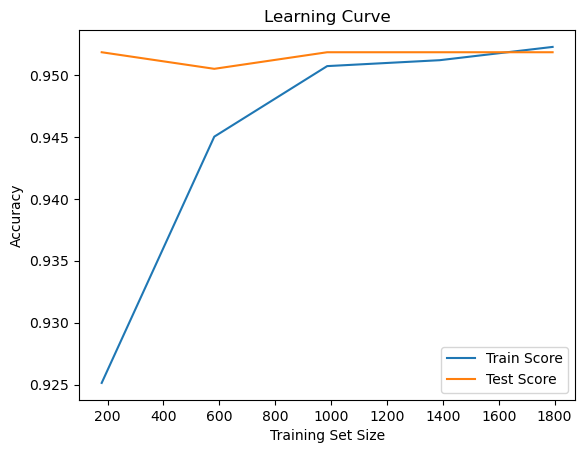

In [206]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy')

    plt.figure()
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Train Score")
    plt.plot(train_sizes, test_scores.mean(axis=1), label="Test Score")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend()
    plt.show()

# Example usage
plot_learning_curve(rf_gridsearch_CPV.best_estimator_, X_ts_CPV_FS, y_ts_CPV)


C:\Users\arthu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


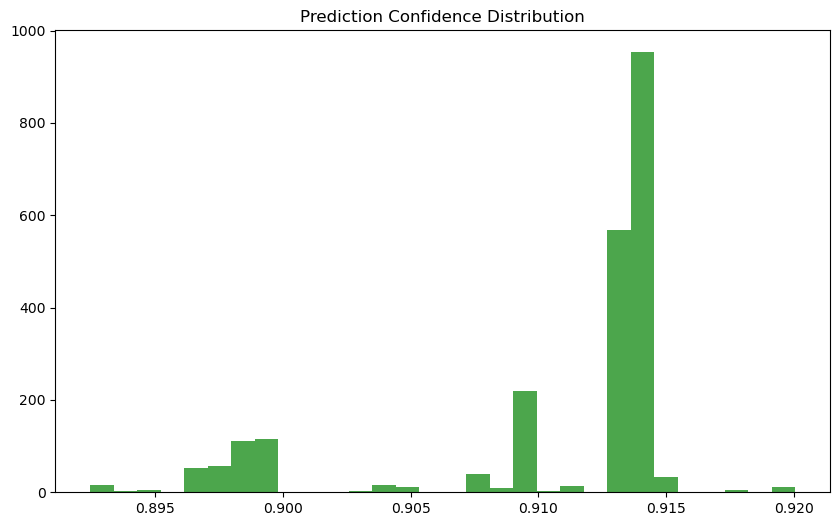

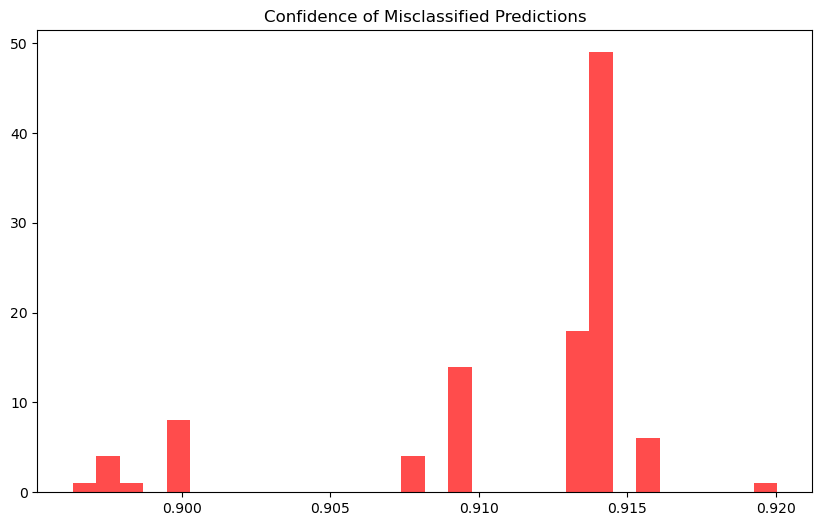

In [207]:
def prediction_confidence_analysis(model, X, y_true, y_pred):
    probabilities = model.predict_proba(X)
    confidence = np.max(probabilities, axis=1)  # Confidence is the max predicted probability
    
    plt.figure(figsize=(10, 6))
    plt.hist(confidence, bins=30, color='green', alpha=0.7)
    plt.title("Prediction Confidence Distribution")
    plt.show()

    misclassified_confidence = confidence[y_true != y_pred]
    plt.figure(figsize=(10, 6))
    plt.hist(misclassified_confidence, bins=30, color='red', alpha=0.7)
    plt.title("Confidence of Misclassified Predictions")
    plt.show()

# Example usage
prediction_confidence_analysis(rf_gridsearch_CPV.best_estimator_, X_ts_CPV_FS, y_ts_CPV, y_pred_all)


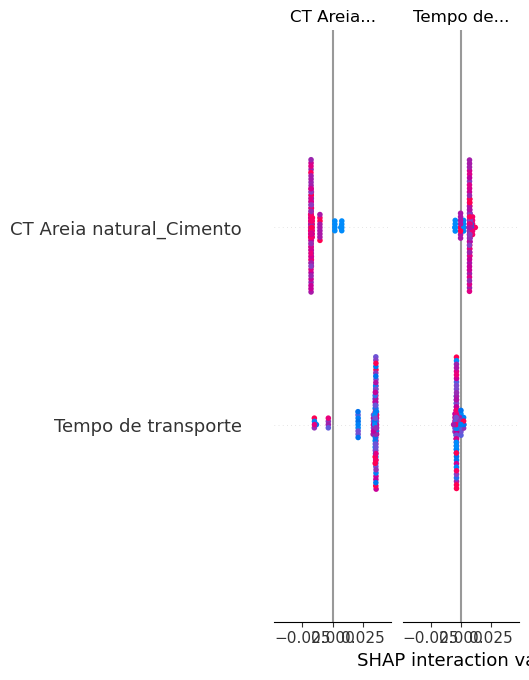

C:\Users\arthu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


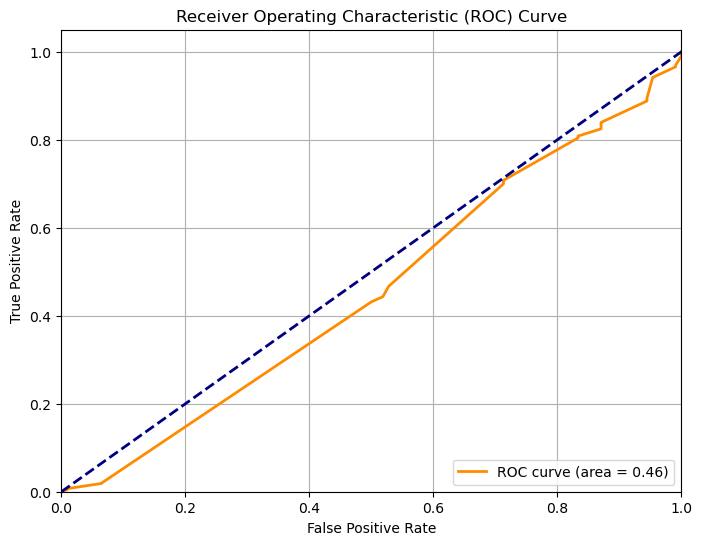

In [210]:
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def shap_error_analysis(model, X, y_true, y_pred, X_test=None, y_test=None):
    # Identify misclassified samples
    misclassified_indices = (y_true != y_pred)
    
    # Use TreeExplainer for tree-based models (like RandomForest)
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values for the misclassified samples
    shap_values = explainer.shap_values(X[misclassified_indices])
    
    # Plot SHAP values summary for misclassified instances
    shap.summary_plot(shap_values, X[misclassified_indices])
    
    # ROC Plot (for binary classification)
    if X_test is not None and y_test is not None:
        # Predict probabilities for the positive class
        y_proba = model.predict_proba(X_test)[:, 1]
        
        # Compute ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

# Example usage
shap_error_analysis(rf_gridsearch_CPV.best_estimator_, X_ts_CPV_FS, y_ts_CPV, y_pred_all, X_ts_CPV_FS, y_ts_CPV)


In [ ]:
s(rf_gridsearch_CPV.best_estimator_, X_ts_CPV_FS, y_ts_CPV, y_pred_all)

In [190]:
len(y_ts_CPV), len(y_pred_all)

(2242, 2242)

Mean Squared Error (MSE): 14.946264965605005
Mean Absolute Error (MAE): 2.99655861755514
R-squared (R2): 0.6520378756237625


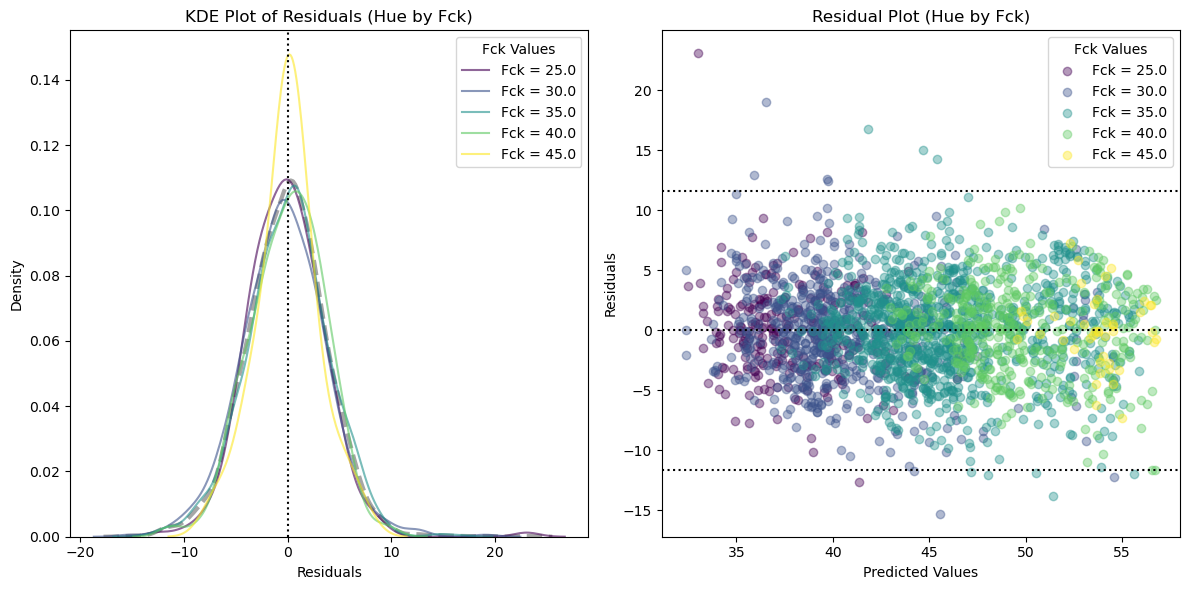

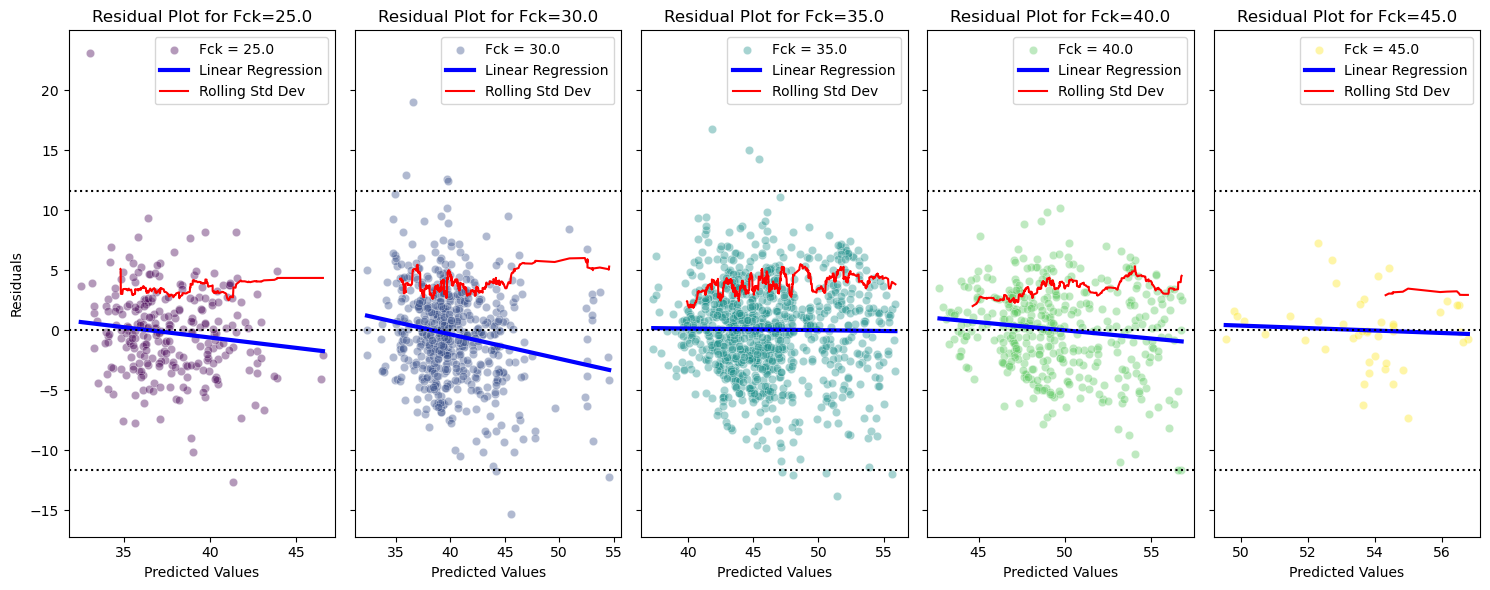

In [20]:
plot_residuals(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, group_columns, regressors = rf_gridsearch_CPV)

plot_residuals_with_rolling_std(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, group_columns,
                                window_size = 30, regressors = rf_gridsearch_CPV)

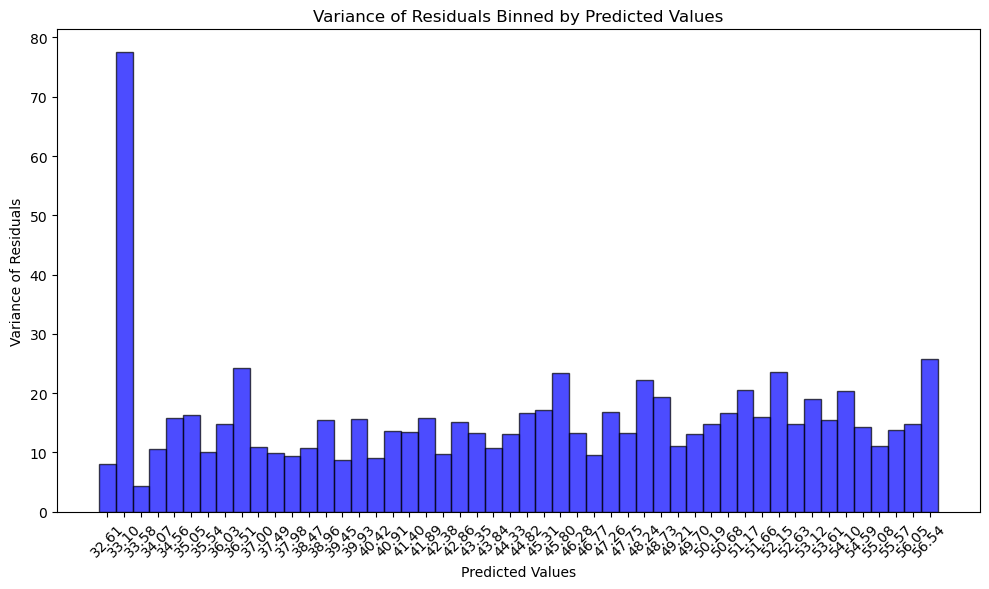

Levene's Test: Statistic = 6.675028905040449, p-value = 0.000174592029017534
Bartlett's Test: Statistic = 15.961771715571173, p-value = 0.001154633135780593


In [21]:
plot_residuals_binned_variance(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, n_bins=50, regressor = rf_gridsearch_CPV)
test_variance_homogeneity(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, regressor = rf_gridsearch_CPV)

**-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----**


Ciment: CP II	 "Treino": (3412, 39)	 "Teste": (1461, 39)


Fck: 25.0	 Treino: (125, 34)	 Validação: (54, 34)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(125, 15)","(54, 15)",1.249659,0.853329,3.125732,0.05561,3.375141,0.034497




Fck: 30.0	 Treino: (942, 35)	 Validação: (403, 35)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(942, 15)","(403, 15)",1.599829,0.768378,2.91432,0.254333,2.999413,0.291603




Fck: 35.0	 Treino: (1181, 36)	 Validação: (506, 36)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(1181, 15)","(506, 15)",1.528185,0.755738,2.768573,0.173104,2.614206,0.278836




Fck: 40.0	 Treino: (1164, 36)	 Validação: (498, 36)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(1164, 15)","(498, 15)",1.55536,0.783211,2.795681,0.320159,2.75765,0.34311



Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val,Shape_treino,Shape_teste
Random Forest Regressor,2.854962,1.631224,2.834007,13.158247,4.47318,13.1715,0.619053,0.868484,0.612185,"(3412, 15)","(1461, 15)"



 Compilado resultados:


,CP_Fck,Model,MAE_tr,R2_tr,MAE_test,R2_test,Shape_treino,Shape_teste
0,CP II_25.0,Random Forest Regressor,1.249659,0.853329,3.375141,0.034497,"(125, 15)","(54, 15)"
1,CP II_30.0,Random Forest Regressor,1.599829,0.768378,2.999413,0.291603,"(942, 15)","(403, 15)"
2,CP II_35.0,Random Forest Regressor,1.528185,0.755738,2.614206,0.278836,"(1181, 15)","(506, 15)"
3,CP II_40.0,Random Forest Regressor,1.555360,0.783211,2.757650,0.343110,"(1164, 15)","(498, 15)"
4,CP II_all,Random Forest Regressor,1.631224,0.868484,2.854962,0.619053,"(3412, 15)","(1461, 15)"


Mean Squared Error (MSE): 11.770360543015503
Mean Absolute Error (MAE): 2.7006200084454726
R-squared (R2): 0.6592338672131393


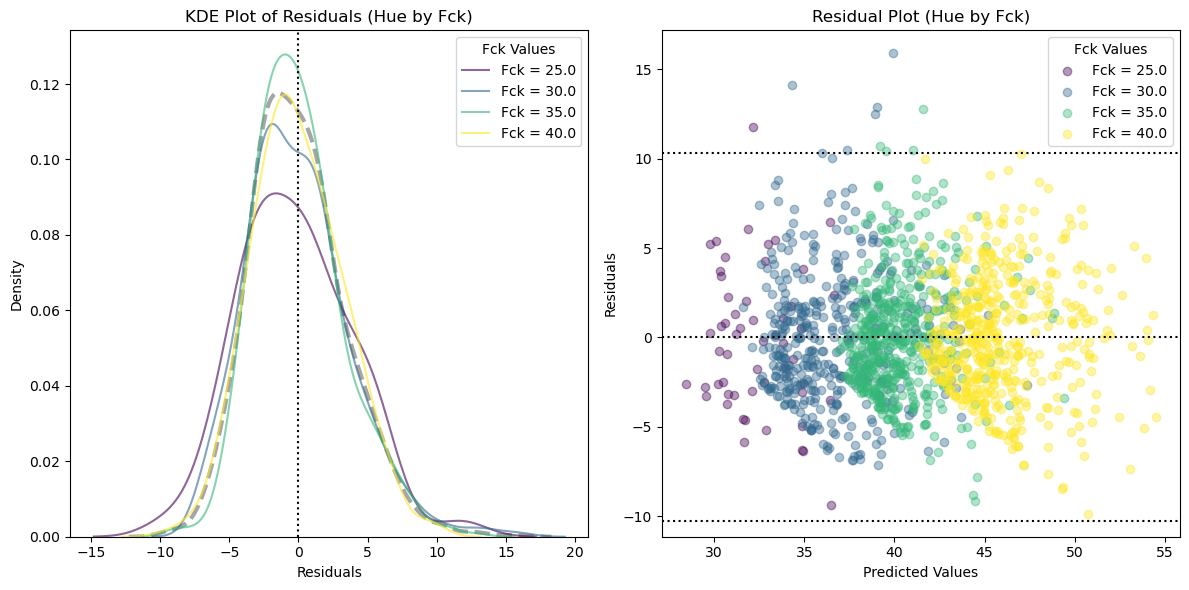

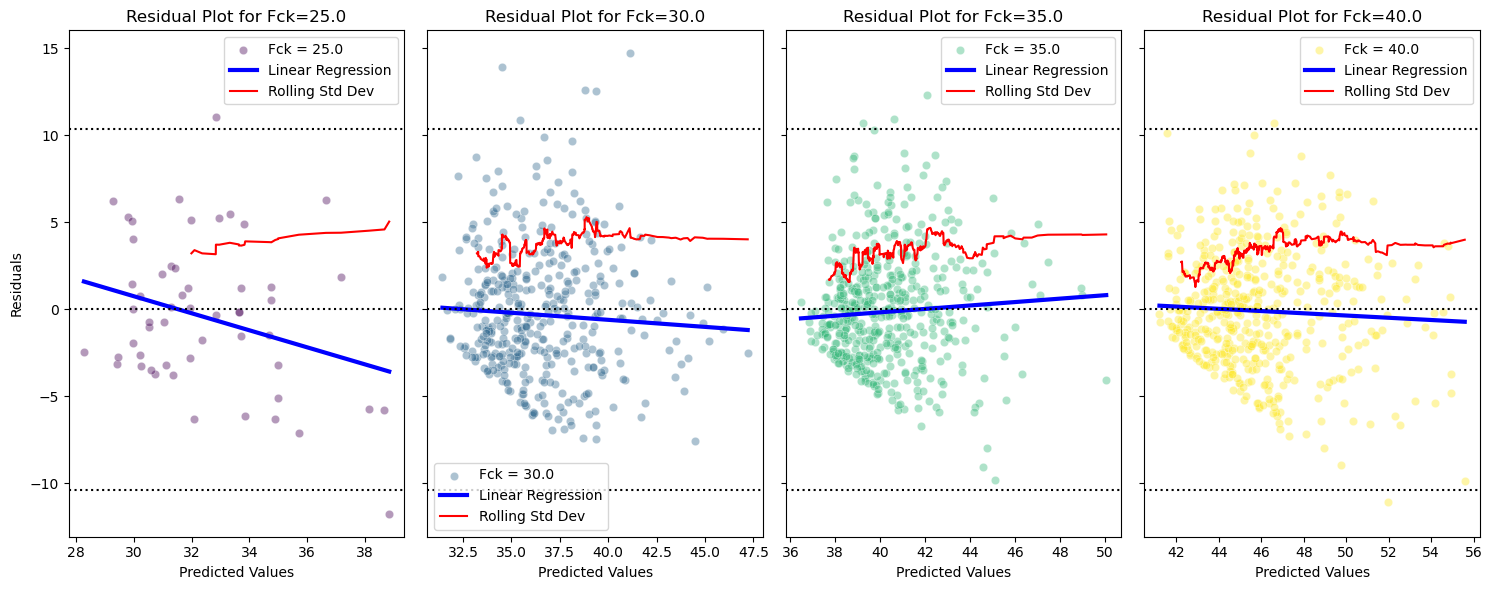

**-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----**


Ciment: CPIII|CP IV	 "Treino": (1377, 39)	 "Teste": (591, 39)


Fck: 25.0	 Treino: (23, 34)	 Validação: (10, 34)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 25}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(23, 15)","(10, 15)",2.507608,0.184113,2.911383,-0.405781,3.813032,-0.314554




Fck: 30.0	 Treino: (382, 35)	 Validação: (163, 35)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 25}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': False, 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(382, 15)","(163, 15)",3.631337,0.408196,3.746359,0.358136,4.353917,0.310846




Fck: 35.0	 Treino: (333, 35)	 Validação: (143, 35)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(333, 15)","(143, 15)",2.097424,0.651219,2.763275,0.361746,2.993914,0.369647




Fck: 40.0	 Treino: (571, 36)	 Validação: (246, 36)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 75}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(571, 15)","(246, 15)",2.03975,0.673178,2.594054,0.449137,2.636905,0.395064




Fck: 45.0	 Treino: (68, 28)	 Validação: (29, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(68, 15)","(29, 15)",2.406704,0.464586,3.542847,-0.14808,3.220009,-0.034504



Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val,Shape_treino,Shape_teste
Random Forest Regressor,3.183877,1.921611,3.058735,16.707103,6.302185,16.444714,0.596692,0.848898,0.604095,"(1377, 15)","(591, 15)"



 Compilado resultados:


,CP_Fck,Model,MAE_tr,R2_tr,MAE_test,R2_test,Shape_treino,Shape_teste
0,CP II_25.0,Random Forest Regressor,1.249659,0.853329,3.375141,0.034497,"(125, 15)","(54, 15)"
1,CP II_30.0,Random Forest Regressor,1.599829,0.768378,2.999413,0.291603,"(942, 15)","(403, 15)"
2,CP II_35.0,Random Forest Regressor,1.528185,0.755738,2.614206,0.278836,"(1181, 15)","(506, 15)"
3,CP II_40.0,Random Forest Regressor,1.555360,0.783211,2.757650,0.343110,"(1164, 15)","(498, 15)"
4,CP II_all,Random Forest Regressor,1.631224,0.868484,2.854962,0.619053,"(3412, 15)","(1461, 15)"
5,CPIII|CP IV_25.0,Random Forest Regressor,2.507608,0.184113,3.813032,-0.314554,"(23, 15)","(10, 15)"
6,CPIII|CP IV_30.0,Random Forest Regressor,3.631337,0.408196,4.353917,0.310846,"(382, 15)","(163, 15)"
7,CPIII|CP IV_35.0,Random Forest Regressor,2.097424,0.651219,2.993914,0.369647,"(333, 15)","(143, 15)"
8,CPIII|CP IV_40.0,Random Forest Regressor,2.039750,0.673178,2.636905,0.395064,"(571, 15)","(246, 15)"
9,CPIII|CP IV_45.0,Random Forest Regressor,2.406704,0.464586,3.220009,-0.034504,"(68, 15)","(29, 15)"


Mean Squared Error (MSE): 15.391242207576795
Mean Absolute Error (MAE): 3.048393852868457
R-squared (R2): 0.6284571805334283


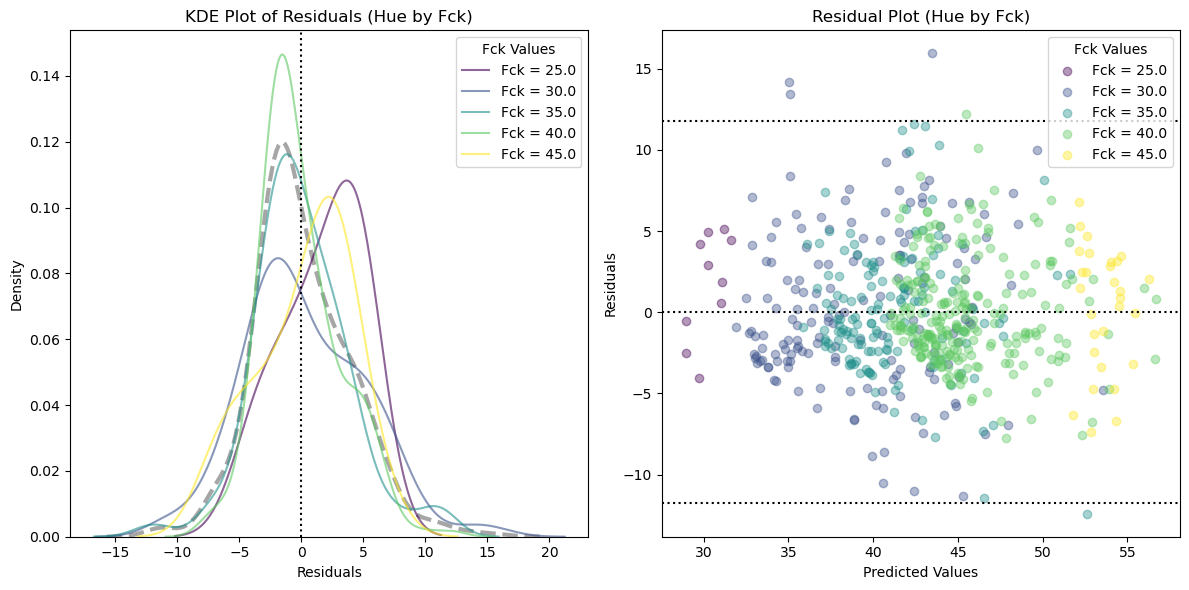

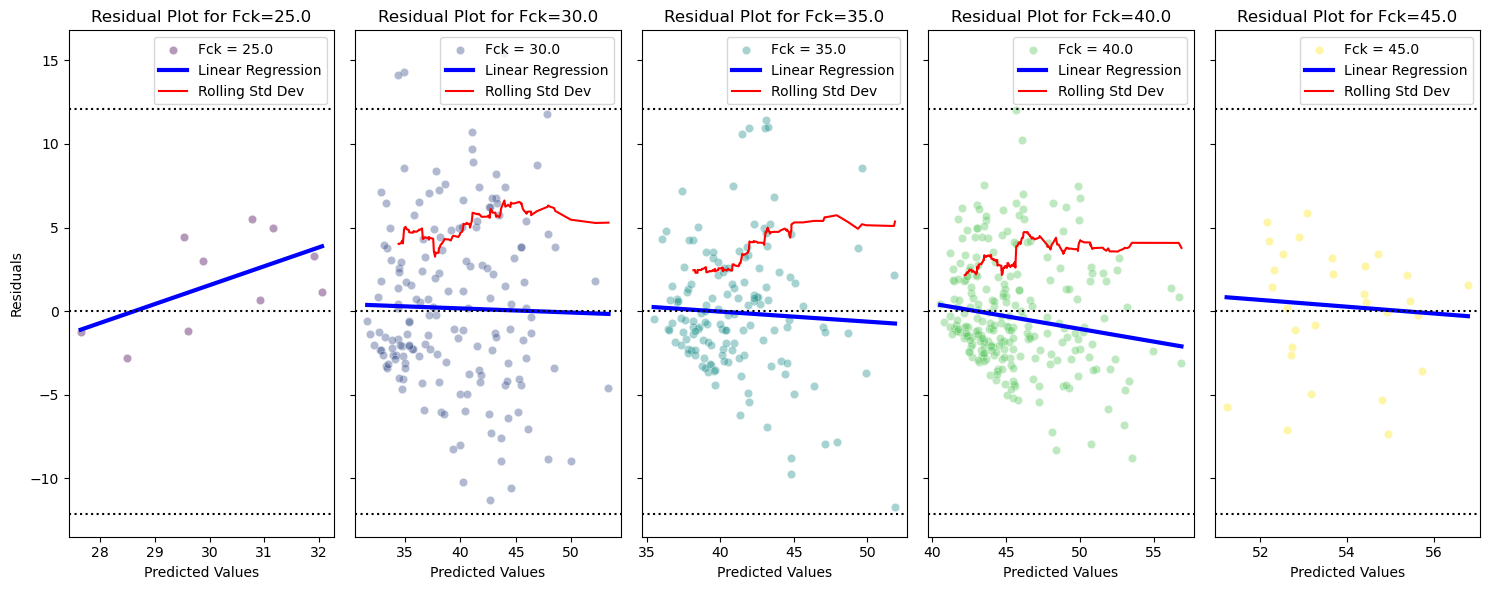

**-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----**


Ciment: CPV	 "Treino": (5264, 39)	 "Teste": (2257, 39)


Fck: 25.0	 Treino: (603, 28)	 Validação: (258, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 25}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(603, 15)","(258, 15)",2.735414,0.388579,3.054169,0.218203,2.889544,0.15454




Fck: 30.0	 Treino: (1351, 27)	 Validação: (580, 27)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(1351, 15)","(580, 15)",2.452125,0.61287,3.136164,0.368707,3.112927,0.321147




Fck: 35.0	 Treino: (2246, 28)	 Validação: (964, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(2246, 15)","(964, 15)",2.420962,0.669689,3.084686,0.467596,3.109346,0.467473




Fck: 40.0	 Treino: (956, 28)	 Validação: (411, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(956, 15)","(411, 15)",2.240385,0.655933,3.024539,0.368212,2.980403,0.323901




Fck: 45.0	 Treino: (101, 28)	 Validação: (44, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(101, 15)","(44, 15)",2.138847,0.507529,2.885072,0.123265,2.245348,0.145425



Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 75}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val,Shape_treino,Shape_teste
Random Forest Regressor,3.040161,2.530213,3.084416,15.160039,10.170649,15.128224,0.646975,0.762747,0.647061,"(5264, 15)","(2257, 15)"



 Compilado resultados:


,CP_Fck,Model,MAE_tr,R2_tr,MAE_test,R2_test,Shape_treino,Shape_teste
0,CP II_25.0,Random Forest Regressor,1.249659,0.853329,3.375141,0.034497,"(125, 15)","(54, 15)"
1,CP II_30.0,Random Forest Regressor,1.599829,0.768378,2.999413,0.291603,"(942, 15)","(403, 15)"
2,CP II_35.0,Random Forest Regressor,1.528185,0.755738,2.614206,0.278836,"(1181, 15)","(506, 15)"
3,CP II_40.0,Random Forest Regressor,1.555360,0.783211,2.757650,0.343110,"(1164, 15)","(498, 15)"
4,CP II_all,Random Forest Regressor,1.631224,0.868484,2.854962,0.619053,"(3412, 15)","(1461, 15)"
5,CPIII|CP IV_25.0,Random Forest Regressor,2.507608,0.184113,3.813032,-0.314554,"(23, 15)","(10, 15)"
6,CPIII|CP IV_30.0,Random Forest Regressor,3.631337,0.408196,4.353917,0.310846,"(382, 15)","(163, 15)"
7,CPIII|CP IV_35.0,Random Forest Regressor,2.097424,0.651219,2.993914,0.369647,"(333, 15)","(143, 15)"
8,CPIII|CP IV_40.0,Random Forest Regressor,2.039750,0.673178,2.636905,0.395064,"(571, 15)","(246, 15)"
9,CPIII|CP IV_45.0,Random Forest Regressor,2.406704,0.464586,3.220009,-0.034504,"(68, 15)","(29, 15)"


Mean Squared Error (MSE): 14.351331868026811
Mean Absolute Error (MAE): 2.9510289762597135
R-squared (R2): 0.6658070428031404


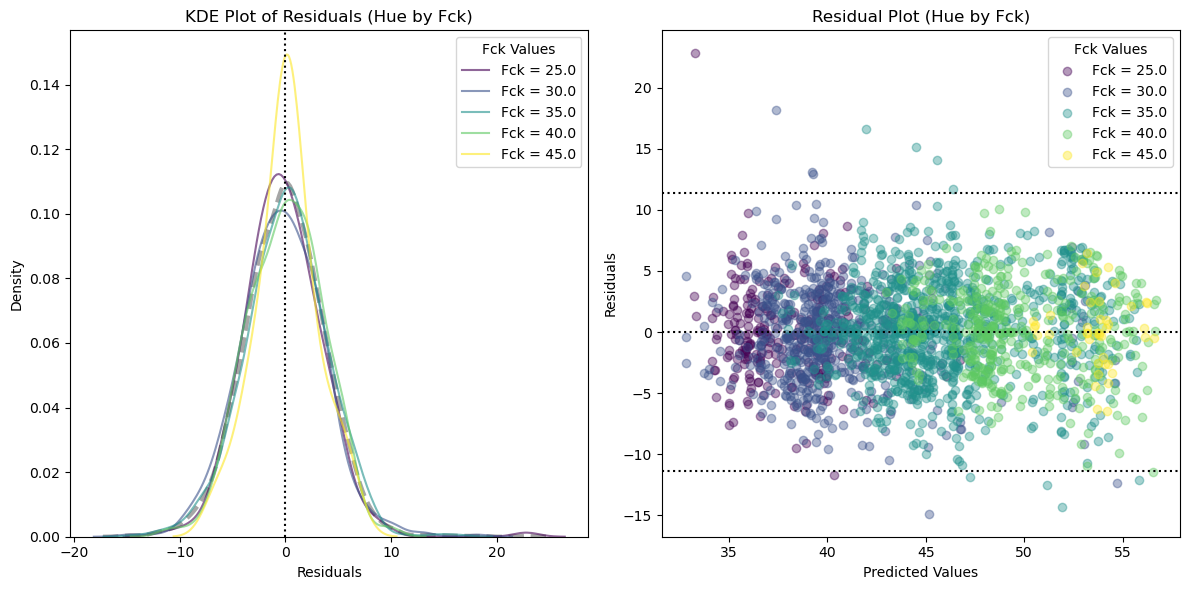

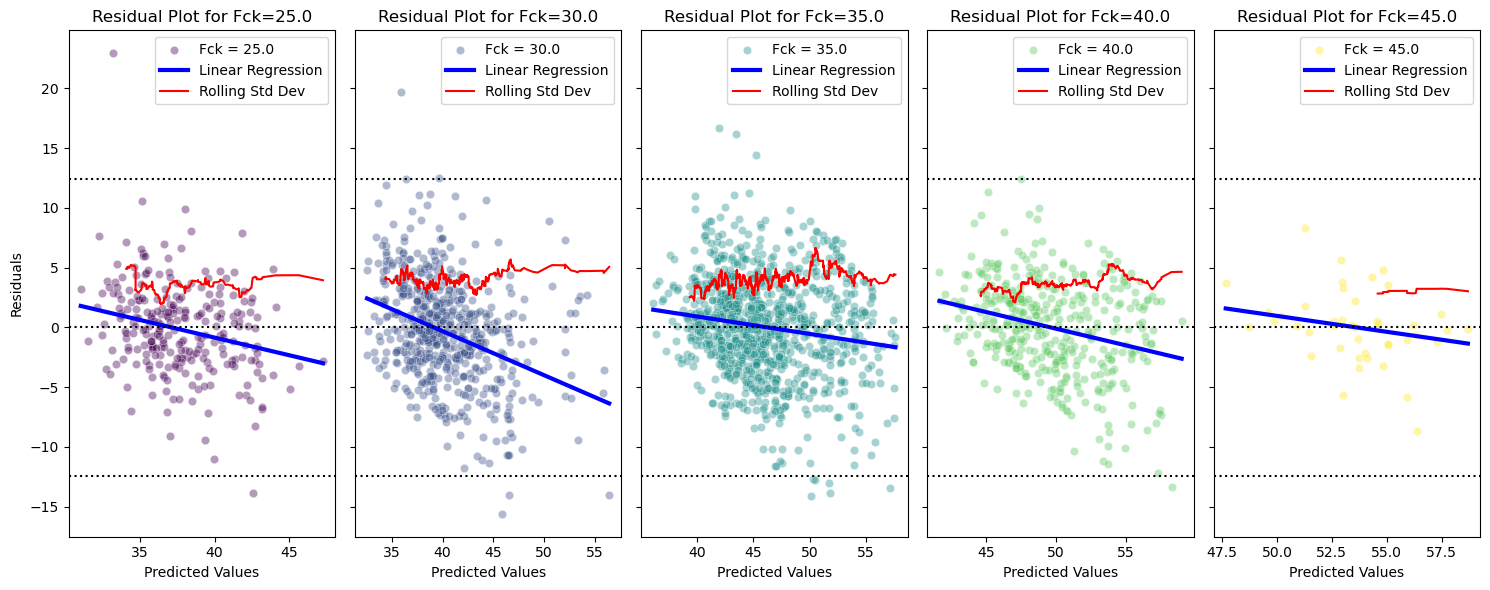

In [85]:
run_experiment_ciment_fck(X_tr = X_tr,
                          X_ts = X_ts,
                          y_tr = y_tr,
                          y_ts = y_ts,
                          param_grid_feat_selection = param_grid_feat_selection,
                          param_grid_regressor = param_grid_regressor,
                          group_columns = group_columns,
                          n_splits = 3)

# Classificador